In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rc, rcParams, style
#style.use('default')
rcParams['text.usetex'] = True
#rcParams['text.latex.unicode'] = True
rc('font', **{'family': 'Times'})
rc('text', usetex=True)
rc('font', size=16)# Set the default text font size
rc('axes', titlesize=20)# Set the axes title font size
rc('axes', labelsize=16)# Set the axes labels font size
rc('xtick', labelsize=14)# Set the font size for x tick labels
rc('ytick', labelsize=14)# Set the font size for y tick labels
rc('legend', fontsize=16)# Set the legend font size

In [3]:
def draw_mean(df_beta, df_amise, save_file=None):
    fig = plt.figure(figsize=(5, 4))
    for i, method in enumerate(df_beta["method"].unique()):
        #plt.scatter(df_beta["size"].unique(), df_beta[df_beta["method"]==method]["pf_ic_low"], marker="_", color=f"C7")
        #plt.scatter(df_beta["size"].unique(), df_beta[df_beta["method"]==method]["pf_ic_up"], marker="_", color=f"C7")
        plt.fill_between(df_beta["size"].unique(), df_beta[df_beta["method"]==method]["pf_ic_low"], df_beta[df_beta["method"]==method]["pf_ic_up"] , color=f"C3", alpha=0.2)
        plt.plot(df_beta["size"].unique(), df_beta[df_beta["method"]==method]["pf_mean"], label=method + " (Beta tuning)", marker="d", color=f"C3")

    for i, method in enumerate(df_amise["method"].unique()):
        if method=="BANCS":
            label = "BANCS (AMISE tuning)"
        else : 
            label = method
        plt.fill_between(df_amise["size"].unique(), df_amise[df_amise["method"]==method]["pf_ic_low"], df_amise[df_amise["method"]==method]["pf_ic_up"], color=f"C{i}", alpha=0.2)
        plt.plot(df_amise["size"].unique(), df_amise[df_amise["method"]==method]["pf_mean"], label=label, marker="d", color=f"C{i}")
    #plt.axhline(df_amise["pf_ref"].unique(), color="k", zorder=0, label="Reference $p_\mathrm{f}$")
    plt.axhline(df_amise["pf_ref"].unique(), color="k", zorder=0)

    plt.legend(ncols=2, bbox_to_anchor=(1.05, -0.15))
    plt.title("Adaptive reliability benchmark (100 reps)")
    plt.xlabel("Subset size ($N$)")
    plt.ylabel("Mean($\hat{p_\mathrm{f}}$)")
    plt.grid()
    if save_file is not None:
        plt.savefig(save_file, dpi=300, bbox_inches='tight')
    return fig

def draw_stat(df_beta, df_amise, stat="pf_std", save_file=None):
    fig = plt.figure(figsize=(5, 4))
    for i, method in enumerate(df_beta["method"].unique()):
        plt.plot(df_beta["size"].unique(), df_beta[df_beta["method"]==method][stat], label=method + " (Beta tuning)", marker="d", color=f"C3")

    for i, method in enumerate(df_amise["method"].unique()):
        if method=="BANCS": 
            label = "BANCS (AMISE tuning)"
        else : 
            label = method
        plt.plot(df_amise["size"].unique(), df_amise[df_amise["method"]==method][stat], label=label, marker="d", color=f"C{i}")
    plt.legend(ncols=2, bbox_to_anchor=(1.05, -0.15))
    plt.title("Adaptive reliability benchmark (100 reps)")
    plt.xlabel("Subset size ($N$)")
    if stat == "pf_std":
        plt.ylabel("Standard deviation($\hat{p_\mathrm{f}}$)")
    elif stat == "pf_med":
        plt.ylabel("Median($\hat{p_\mathrm{f}}$)")
    plt.grid()
    if save_file is not None:
        plt.savefig(save_file, dpi=300, bbox_inches='tight')
    return fig

def draw_cov(df_beta, df_amise, save_file=None):
    fig = plt.figure(figsize=(5, 4))
    for i, method in enumerate(df_beta["method"].unique()):
        plt.plot(df_beta["size"].unique(), df_beta[df_beta["method"]==method]["pf_std"] / df_beta[df_beta["method"]==method]["pf_ref"], label=method + " (Beta tuning)", marker="d", color=f"C3")

    for i, method in enumerate(df_amise["method"].unique()):
        if method=="BANCS": 
            label = "BANCS (AMISE tuning)"
        else : 
            label = method
        plt.plot(df_amise["size"].unique(), df_amise[df_amise["method"]==method]["pf_std"] / df_amise[df_amise["method"]==method]["pf_ref"], label=label, marker="d", color=f"C{i}")
    plt.legend(ncols=2, bbox_to_anchor=(1.05, -0.15))
    plt.title("Adaptive reliability benchmark (100 reps)")
    plt.xlabel("Subset size ($N$)")
    plt.ylabel("Coefficient of variation($\hat{p_\mathrm{f}}$)")
    plt.grid()
    if save_file is not None:
        plt.savefig(save_file, dpi=300, bbox_inches='tight')
    return fig

## Parabolic problem

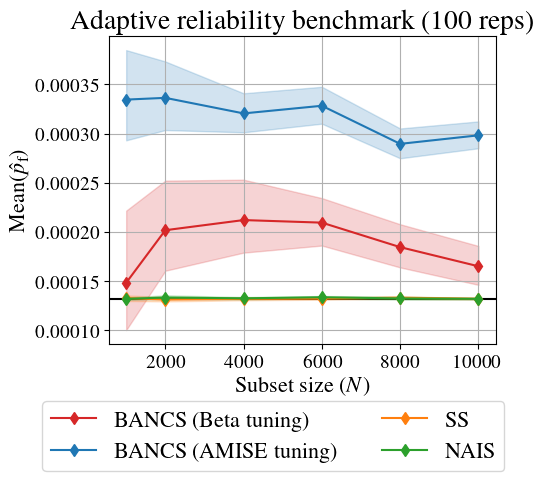

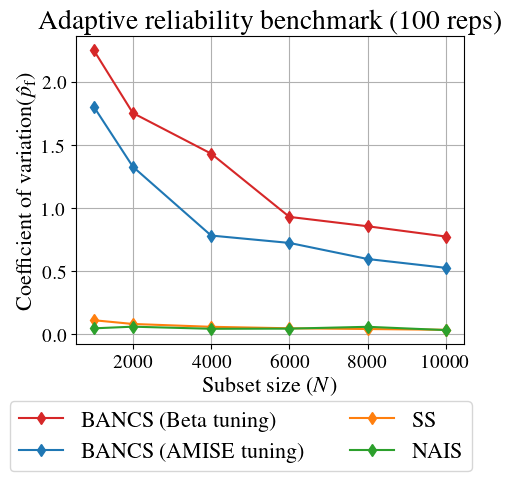

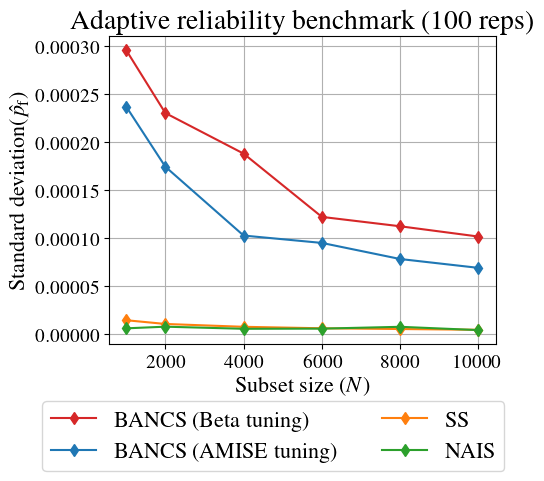

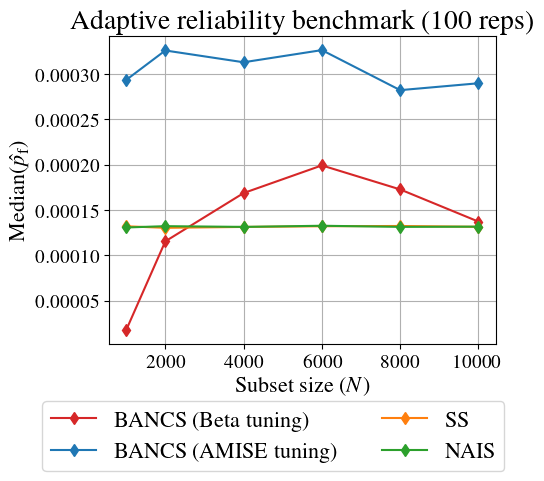

In [4]:
df_beta = pd.read_csv("results/Parabolic_results_beta.csv")
df_amise = pd.read_csv("results/Parabolic_results_amise.csv")

draw_mean(df_beta, df_amise, save_file="figures/Parabolic_mean.pdf");
draw_cov(df_beta, df_amise, save_file="figures/Parabolic_cov.pdf");
draw_stat(df_beta, df_amise, save_file="figures/Parabolic_std.pdf");
draw_stat(df_beta, df_amise, stat="pf_med", save_file="figures/Parabolic_median.pdf");

## Four Branch problem

In [5]:
results20 = pd.read_csv("results/4B_results_m20.csv") 
results40 = pd.read_csv("results/4B_results_m40.csv")
results60 = pd.read_csv("results/4B_results_m60.csv")
results100 = pd.read_csv("results/4B_results_m100.csv")

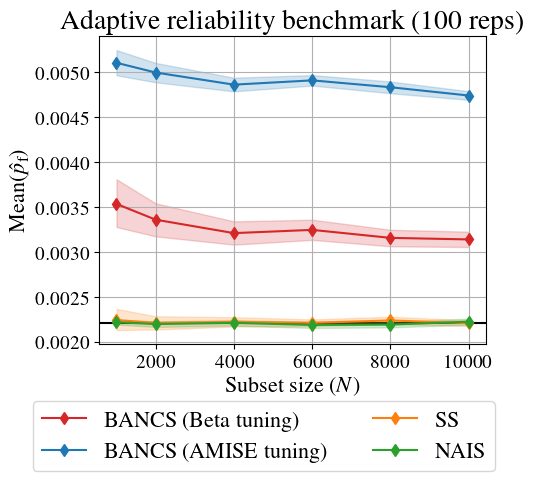

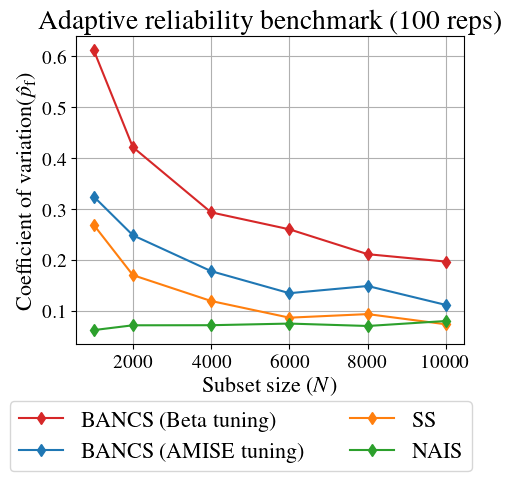

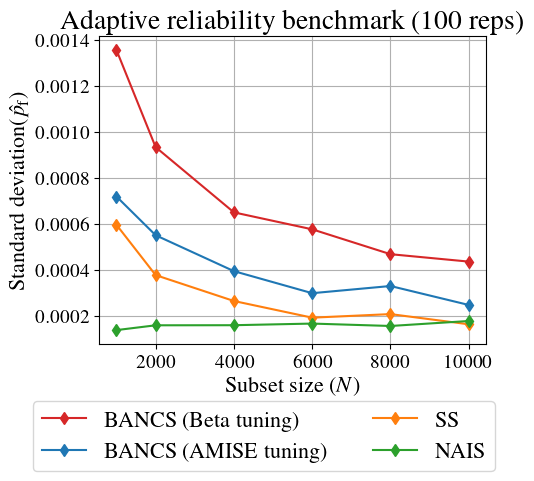

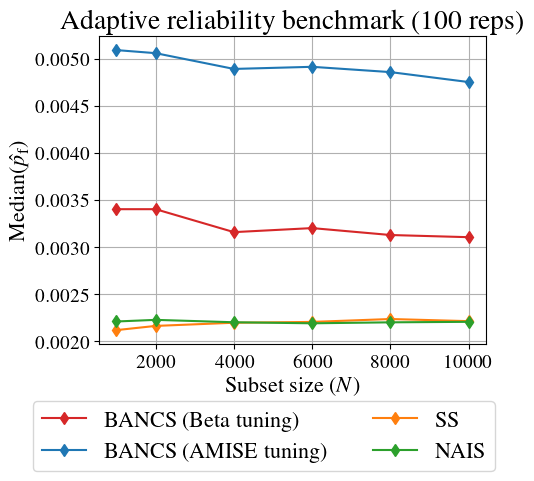

In [6]:
df_beta = pd.read_csv("results/RP4B_results_beta.csv")
df_amise = pd.read_csv("results/RP4B_results_amise.csv")

draw_mean(df_beta, df_amise, save_file="figures/RP4B_mean.pdf");
draw_cov(df_beta, df_amise, save_file="figures/RP4B_cov.pdf");
draw_stat(df_beta, df_amise, save_file="figures/RP4B_std.pdf");
draw_stat(df_beta, df_amise, stat="pf_med", save_file="figures/RP4B_median.pdf");

## Reliability problem 57

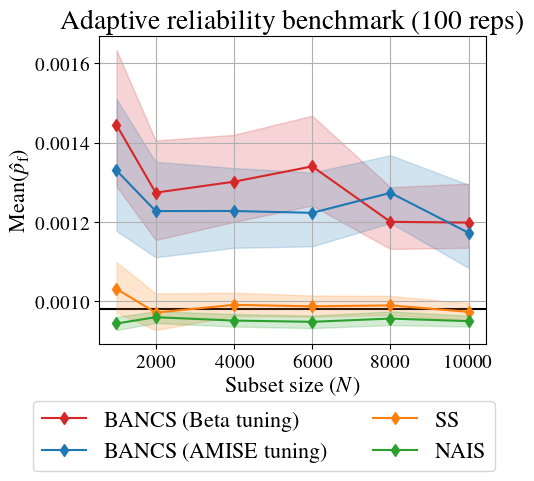

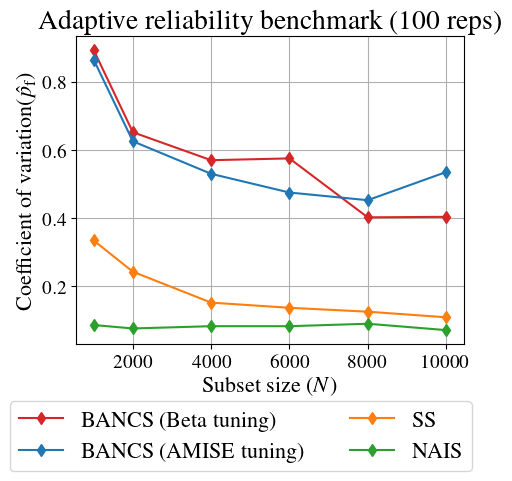

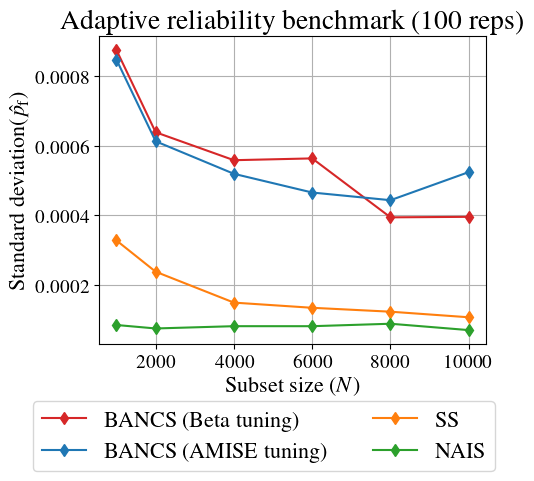

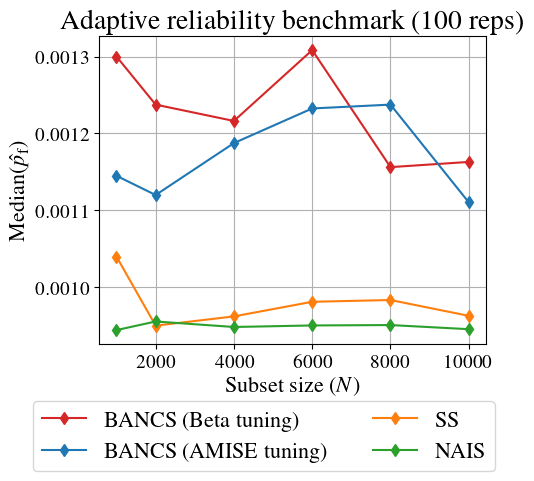

In [7]:
df_beta = pd.read_csv("results/RP57_results_beta.csv")
df_amise = pd.read_csv("results/RP57_results_amise.csv")

draw_mean(df_beta, df_amise, save_file="figures/RP57_mean.pdf");
draw_cov(df_beta, df_amise, save_file="figures/RP57_cov.pdf");
draw_stat(df_beta, df_amise, save_file="figures/RP57_std.pdf");
draw_stat(df_beta, df_amise, stat="pf_med", save_file="figures/RP57_median.pdf");

## Reliability problem 38

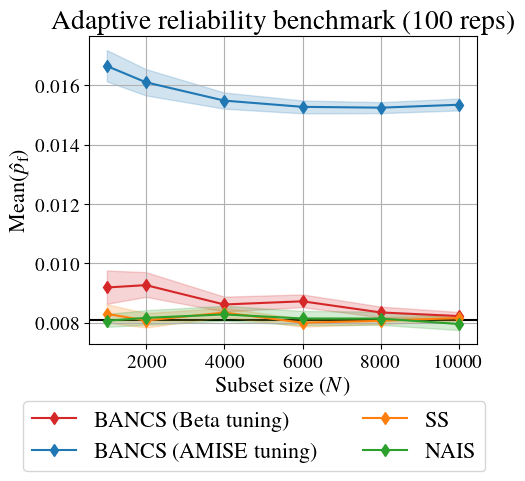

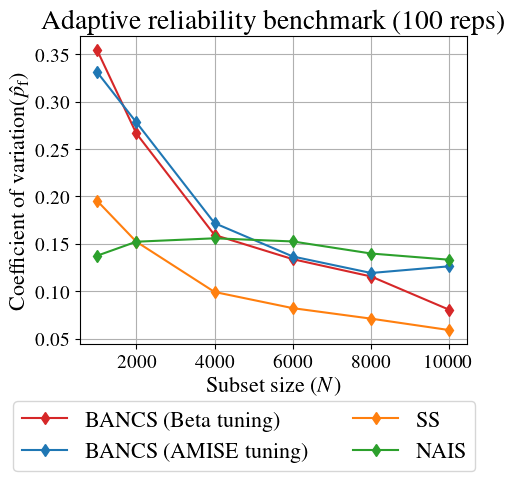

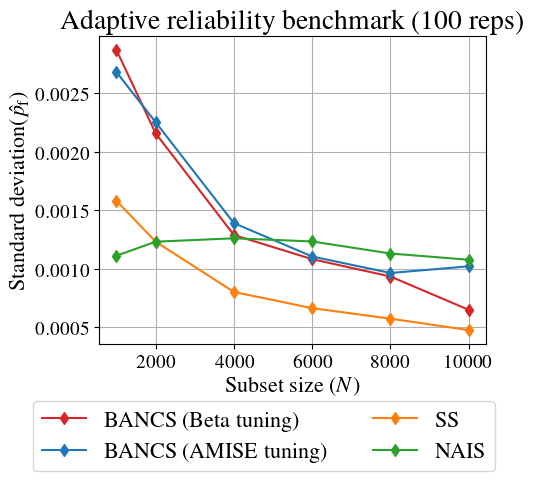

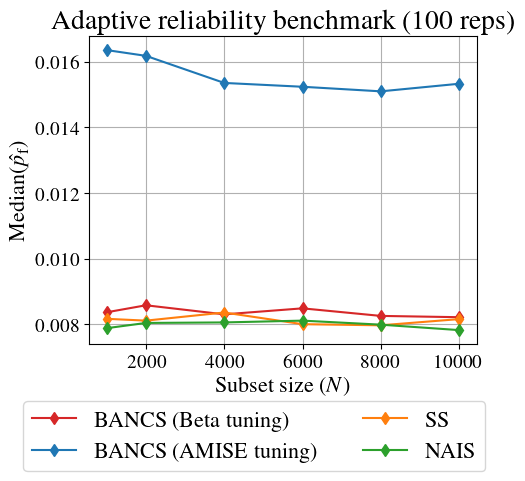

In [8]:
df_beta = pd.read_csv("results/RP38_results_beta.csv")
df_amise = pd.read_csv("results/RP38_results_amise.csv")

draw_mean(df_beta, df_amise, save_file="figures/RP38_mean.pdf");
draw_cov(df_beta, df_amise, save_file="figures/RP38_cov.pdf");
draw_stat(df_beta, df_amise, save_file="figures/RP38_std.pdf");
draw_stat(df_beta, df_amise, stat="pf_med", save_file="figures/RP38_median.pdf");